In [1]:
import numpy as np
import pandas as pd

# load the contents of a file into a pandas Dataframe
input_file = './datasets/titanic_dataset/original/train.csv'
df_titanic = pd.read_csv(input_file)

In [2]:
# set the index
df_titanic.set_index("PassengerId", inplace=True)

pd.set_option('display.max_columns', None)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# extract the target attribute into its own dataframe
df_titanic_target = df_titanic.loc[:,['Survived']]

# create a dataframe that contains the 10 feature variables
df_titanic_features = df_titanic.drop(['Survived'], axis=1)

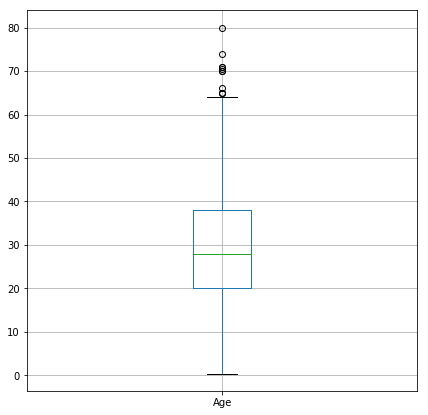

In [4]:
# boxplot of 'Age'
%matplotlib inline
import matplotlib.pyplot as plt

df_titanic_features.boxplot(column='Age', figsize=(7,7))

In [5]:
# fill missing values with the median
median_age = df_titanic_features['Age'].median()
print (median_age)

df_titanic_features["Age"].fillna(median_age, inplace=True)

28.0


In [6]:
# fill missing values of the Embarked attribute
# with the most common value in the column 
embarked_value_counts = df_titanic_features['Embarked'].value_counts(dropna=True)
most_common_value = embarked_value_counts.index[0]

print (most_common_value)

df_titanic_features["Embarked"].fillna(most_common_value, inplace=True)

S


In [7]:
# create a boolean feature 'CabinIsKnown'
# which will have True if the Cabin column
# does not have missing data
df_titanic_features['CabinIsKnown'] = ~df_titanic_features.Cabin.isnull()

# drop the Cabin column from the dataframe
df_titanic_features.drop(['Cabin'], axis=1, inplace=True)

In [8]:
# display the columns of the dataframe.
print (df_titanic_features.columns.values)

# display number of missing values in the columns
df_titanic_features.isnull().sum()

['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Embarked'
 'CabinIsKnown']


Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
CabinIsKnown    0
dtype: int64

In [9]:
# create a numeric feature called FamilySize that is
# the sum of the SibSp and Parch features.
df_titanic_features['FamilySize'] = df_titanic_features.SibSp + df_titanic_features.Parch

In [10]:
# generate new categorical feature AgeCategory
bins_age = [0,20,30,40,50,150]
labels_age = ['<20','20-30','30-40','40-50','>50']

df_titanic_features['AgeCategory'] = pd.cut(df_titanic_features.Age, 
                                            bins=bins_age, 
                                            labels=labels_age, 
                                            include_lowest=True)

In [11]:
# examine the first 10 rows of the dataset
df_titanic_features.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinIsKnown,FamilySize,AgeCategory
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,1,20-30
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,1,30-40
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0,20-30
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,1,30-40
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,0,30-40
6,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,False,0,20-30
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,True,0,>50
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,False,4,<20
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,False,2,20-30


In [12]:
# generate new categorical feature FareCategory
df_titanic_features['FareCategory'] = pd.qcut(df_titanic_features.Fare, 
                                            q=4, 
                                            labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [13]:
# examine the first 10 rows of the dataset
df_titanic_features.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinIsKnown,FamilySize,AgeCategory,FareCategory
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,1,20-30,Q1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,1,30-40,Q4
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0,20-30,Q2
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,1,30-40,Q4
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,0,30-40,Q2
6,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,False,0,20-30,Q2
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,True,0,>50,Q4
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,False,4,<20,Q3
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,False,2,20-30,Q2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fa46240>,
      dtype=object)

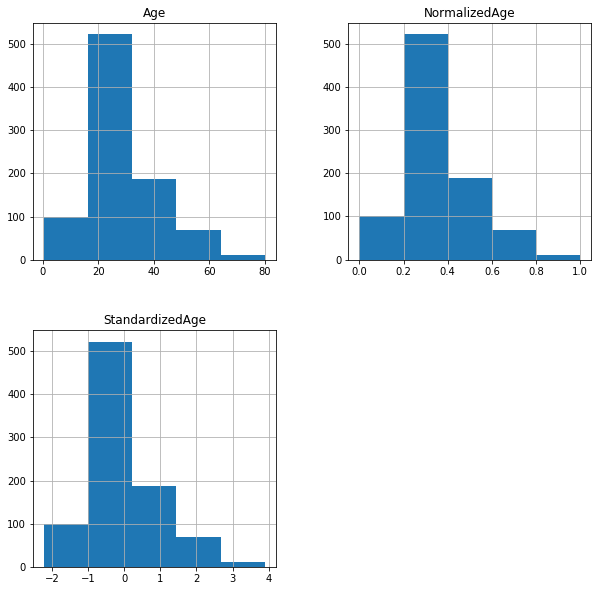

In [14]:
# generate new feature NormalizedAge using MinMaxScaler
from sklearn import preprocessing

minmax_scaler = preprocessing.MinMaxScaler()
ndNormalizedAge = minmax_scaler.fit_transform(df_titanic_features[['Age']].values)
df_titanic_features['NormalizedAge']  = pd.DataFrame(ndNormalizedAge)

# generate new feature StandardizedAge using StandardScaler
standard_scaler = preprocessing.StandardScaler()
ndStandardizedAge = standard_scaler.fit_transform(df_titanic_features[['Age']].values)
df_titanic_features['StandardizedAge']  = pd.DataFrame(ndStandardizedAge)

# histogram of Age, NormalizedAge, StandardizedAge
df_titanic_features[['Age', 'NormalizedAge', 'StandardizedAge']].hist(figsize=(10,10), bins=5)

In [15]:
# use one-hot encoding to convert categorical attributes 
# into binary numeric attributes
df_titanic_features = pd.get_dummies(df_titanic_features, columns=['Sex','Embarked','CabinIsKnown','AgeCategory','FareCategory'])

# display the columns of the dataframe.
print (df_titanic_features.columns.values)

['Pclass' 'Name' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'FamilySize'
 'NormalizedAge' 'StandardizedAge' 'Sex_female' 'Sex_male' 'Embarked_C'
 'Embarked_Q' 'Embarked_S' 'CabinIsKnown_False' 'CabinIsKnown_True'
 'AgeCategory_<20' 'AgeCategory_20-30' 'AgeCategory_30-40'
 'AgeCategory_40-50' 'AgeCategory_>50' 'FareCategory_Q1' 'FareCategory_Q2'
 'FareCategory_Q3' 'FareCategory_Q4']


In [18]:
df_titanic_features[['Sex_male', 'Sex_female']].head()

,Sex_male,Sex_female
PassengerId,,
1,1,0
2,0,1
3,0,1
4,0,1
5,1,0


In [34]:
# strong negative correlation between Sex_male and Sex_femaile.
# one of these can be dropped.
corr_matrix = df_titanic_features[['Sex_male', 'Sex_female']].corr()
print(corr_matrix)

            Sex_male  Sex_female
Sex_male         1.0        -1.0
Sex_female      -1.0         1.0


In [35]:
# drop the Name, Ticket, Sex_female, CabinIsKnown_False features 
# to get a dataframe that can be used for linear or logistic regression
df_titanic_features_numeric = df_titanic_features.drop(['Name', 'Ticket', 'Sex_female', 'CabinIsKnown_False'], axis=1)

In [28]:
# to facilitate computation of Pearson's correlation
# coefficient, create a dataframe that contains all the attributes
# from df_titanic_features_numeric, and the survived attribute 
df_temporary = pd.concat([df_titanic_features_numeric, df_titanic['Survived']], axis=1)
df_temporary.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,NormalizedAge,StandardizedAge,Sex_male,Embarked_C,Embarked_Q,Embarked_S,CabinIsKnown_True,AgeCategory_<20,AgeCategory_20-30,AgeCategory_30-40,AgeCategory_40-50,AgeCategory_>50,FareCategory_Q1,FareCategory_Q2,FareCategory_Q3,FareCategory_Q4,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,1,0.472229,0.663861,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,1,38.0,1,0,71.2833,1,0.321438,-0.258337,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
3,3,26.0,0,0,7.9250,0,0.434531,0.433312,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,1,0.434531,0.433312,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1
5,3,35.0,0,0,8.0500,0,0.346569,-0.104637,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [29]:
# what features show the strongest correlation with the target variable?
corr_matrix = df_temporary.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived             1.000000
CabinIsKnown_True    0.316912
Fare                 0.257307
FareCategory_Q4      0.233638
Embarked_C           0.168240
FareCategory_Q3      0.084239
Parch                0.081629
AgeCategory_<20      0.076565
AgeCategory_30-40    0.057867
FamilySize           0.016639
Embarked_Q           0.003650
AgeCategory_40-50   -0.000079
NormalizedAge       -0.001654
StandardizedAge     -0.001654
AgeCategory_>50     -0.022932
SibSp               -0.035322
Age                 -0.064910
AgeCategory_20-30   -0.093689
FareCategory_Q2     -0.095648
Embarked_S          -0.149683
FareCategory_Q1     -0.221610
Pclass              -0.338481
Sex_male            -0.543351
Name: Survived, dtype: float64